# Data Science for Business (Technical) Project: Credit Risk Assessment for Lending Institutions

Team: 

Anubhav Ghildiyal (ag8766@nyu.edu)
Noel Nebu Panicker (nnp5666@nyu.edu)
Viraj Parikh (vp2359@nyu.edu)
Yogya Sharma (ys5250@nyu.edu)

## Load Data Frame

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_customers.csv')
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Data Exploration

In [ ]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

There are no null values.

In [ ]:
df.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [ ]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

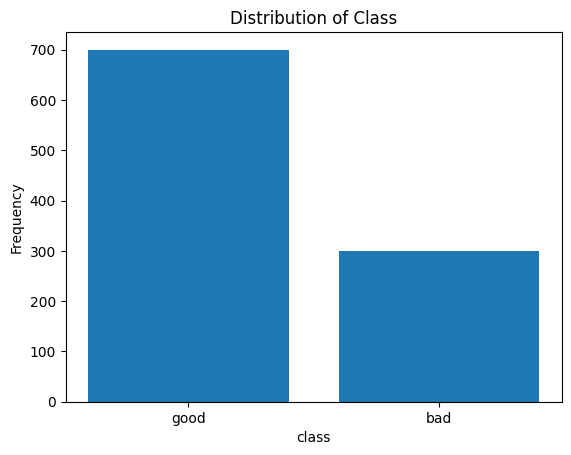

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each category
counts = df['class'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Set labels and title
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

# Show the plot
plt.show()


The target "class" variables are distributed as 700 being good and 300 being bad. 

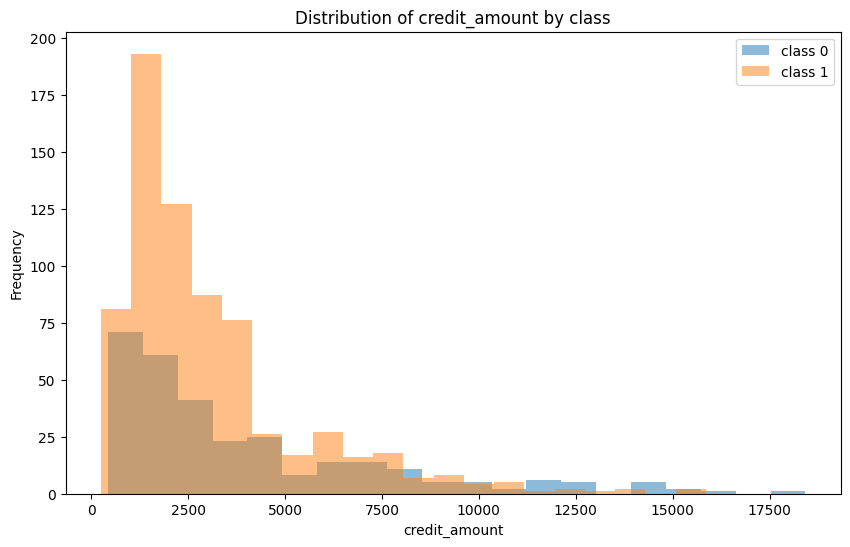

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df[df['class'] == 'bad']['credit_amount'], bins=20, alpha=0.5, label='class 0')
plt.hist(df[df['class'] == 'good']['credit_amount'], bins=20, alpha=0.5, label='class 1')
plt.xlabel('credit_amount')
plt.ylabel('Frequency')
plt.title('Distribution of credit_amount by class')
plt.legend()
plt.show()


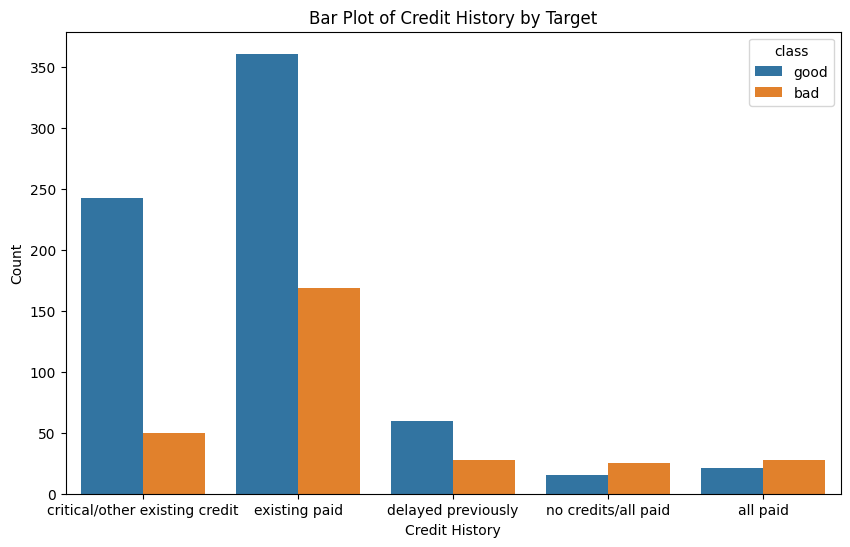

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
sns.countplot(x='credit_history', hue='class', data=df)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Bar Plot of Credit History by Target')
plt.show()


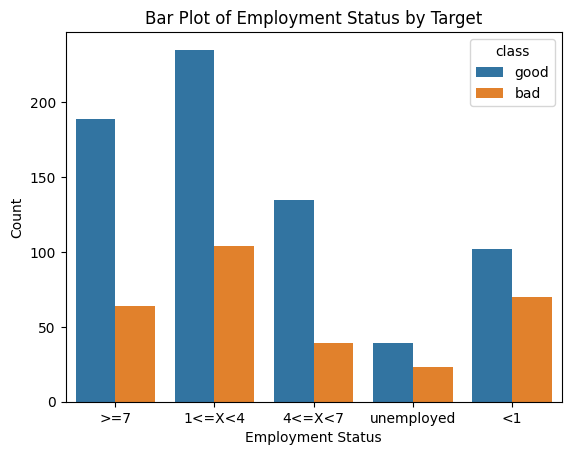

In [ ]:
sns.countplot(x='employment', hue='class', data=df)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Bar Plot of Employment Status by Target')
plt.show()


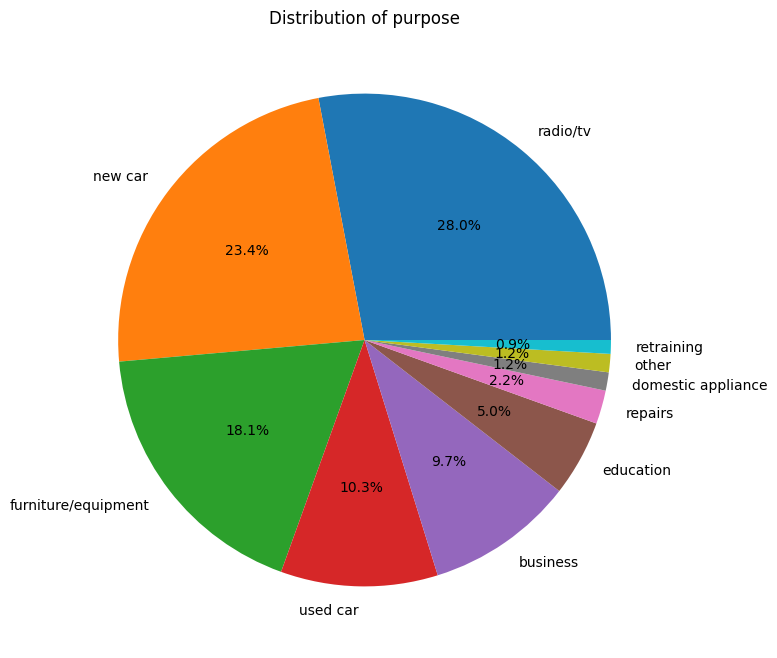

In [ ]:
plt.figure(figsize=(8, 8))
counts = df['purpose'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of purpose')
plt.show()


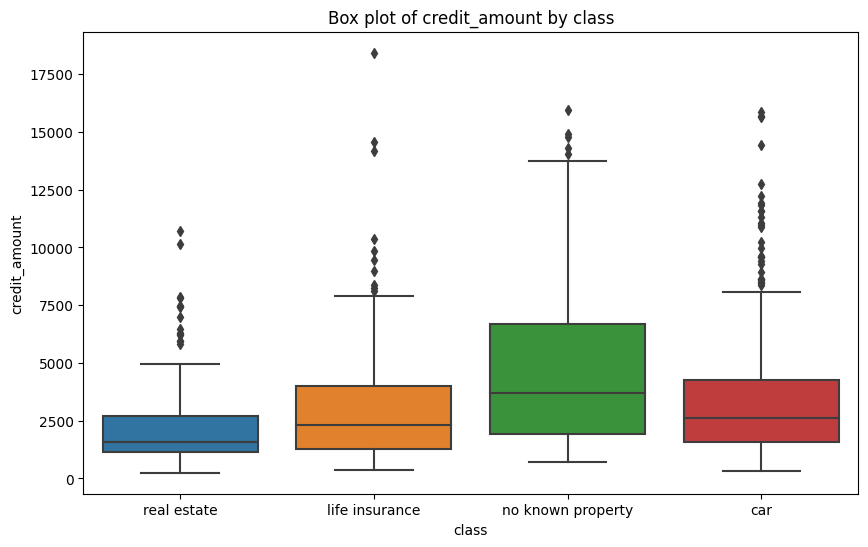

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_magnitude', y='credit_amount', data=df)
plt.xlabel('class')
plt.ylabel('credit_amount')
plt.title('Box plot of credit_amount by class')
plt.show()


In [ ]:
df['job'].value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

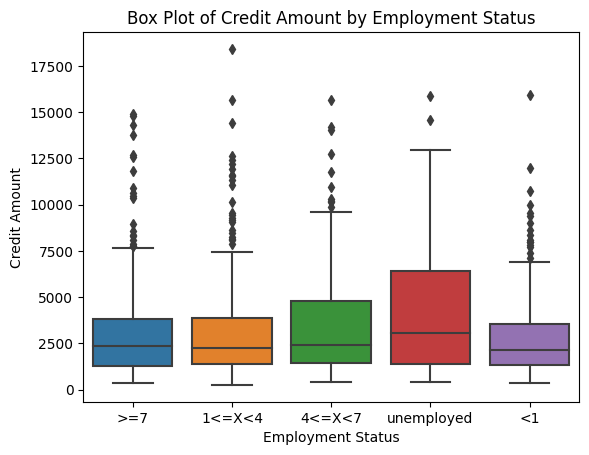

In [ ]:
sns.boxplot(x='employment', y='credit_amount', data=df)
plt.xlabel('Employment Status')
plt.ylabel('Credit Amount')
plt.title('Box Plot of Credit Amount by Employment Status')
plt.show()


<Axes: xlabel='class', ylabel='count'>

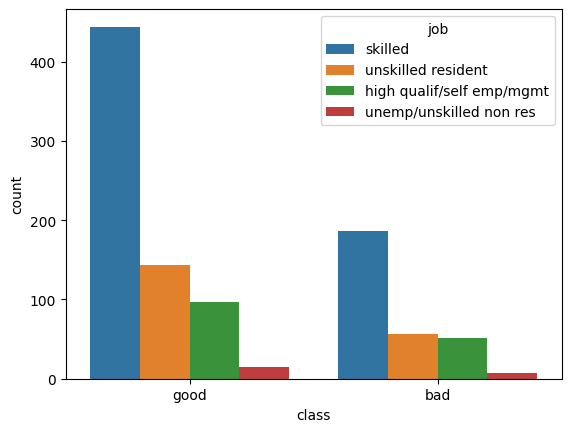

In [ ]:
sns.countplot(data=df, x='class', hue='job')

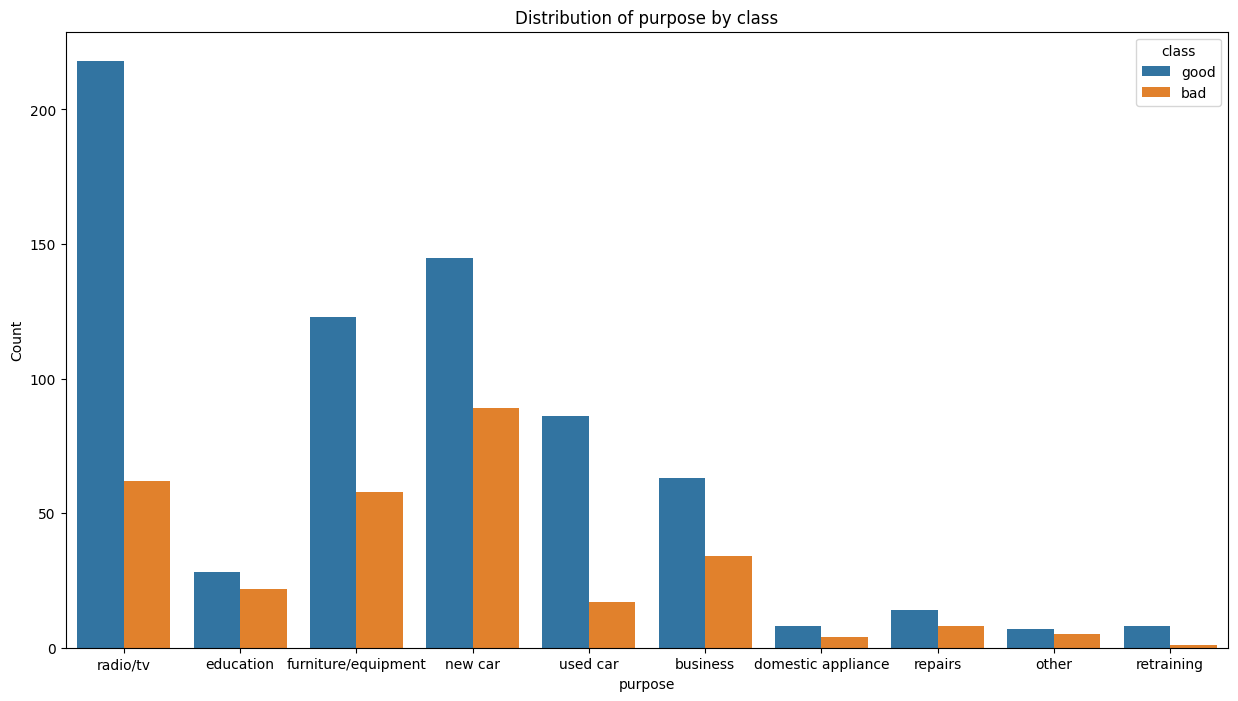

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='purpose', hue='class', data=df)
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Distribution of purpose by class')
plt.show()


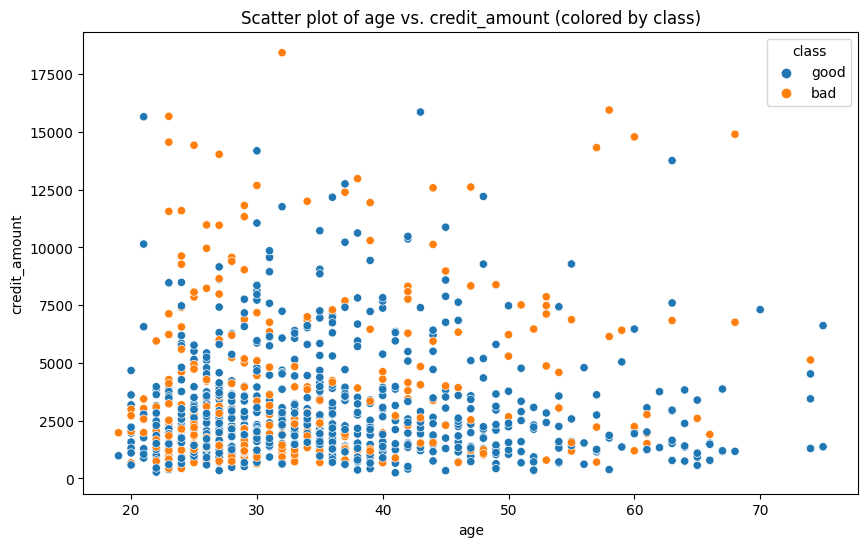

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='credit_amount', hue='class', data=df)
plt.xlabel('age')
plt.ylabel('credit_amount')
plt.title('Scatter plot of age vs. credit_amount (colored by class)')
plt.show()


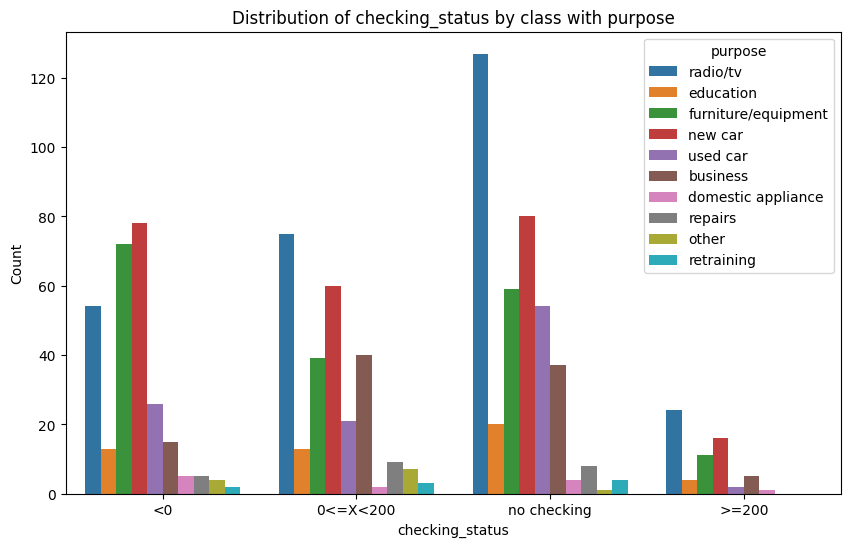

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='checking_status', hue='purpose', data=df)
plt.xlabel('checking_status')
plt.ylabel('Count')
plt.title('Distribution of checking_status by class with purpose')
plt.legend(title='purpose')
plt.show()



## Data Preparation (feature selection and transformation)

Converting some categorical variables into binary variables.

In [ ]:
df['class'] = df['class'].replace({'good' : 1, 'bad' : 0})

unique_values = df["other_parties"].unique()
print(unique_values)

df["other_parties"] = df["other_parties"].replace({'guarantor': 1, 'co applicant': 1, 'none': 0})

unique_values = df["foreign_worker"].unique()
print(unique_values)

df["foreign_worker"] = df["foreign_worker"].replace({'yes': 1, 'no': 0})

unique_values = df["own_telephone"].unique()
print(unique_values)

df["own_telephone"] = df["own_telephone"].replace({'yes': 1, 'none': 0})

unique_values = df["other_payment_plans"].unique()
print(unique_values)

df["other_payment_plans"] = df["other_payment_plans"].replace({'bank': 1, 'stores': 1, 'none': 0})

['none' 'guarantor' 'co applicant']
['yes' 'no']
['yes' 'none']
['none' 'bank' 'stores']


Plotting the heatmap to see correlation of continuous variables with the target variable "class".

<ipython-input-438-5ef250918a4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


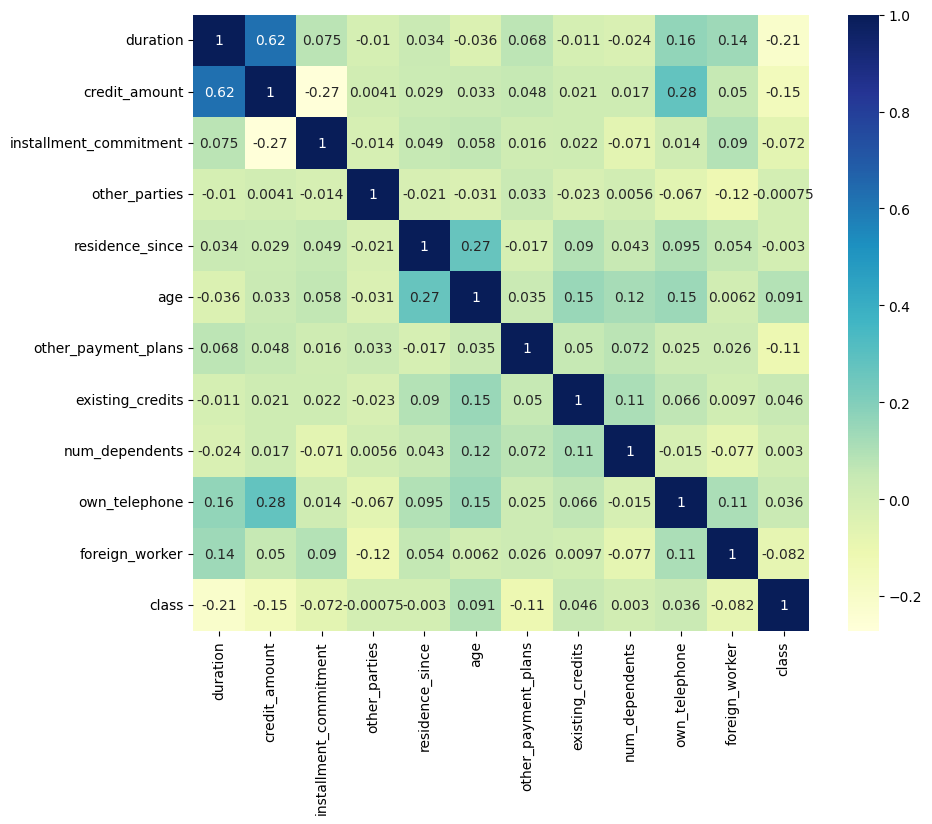

In [ ]:
# create a correlation matrix of the categorical variables
corr_matrix = df.corr()

# set the size of the heatmap
plt.figure(figsize=(10, 8))

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, square=True)

# display the heatmap
plt.show()

To check the association of the categorical variables with the target variable, we conduct a Chi-Square test. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# select the categorical variables
cat_vars = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment',
            'personal_status', 'property_magnitude', 'housing', 'job']

# create a contingency table for each categorical variable and the target variable
results = pd.DataFrame(columns=['chi2_statistic', 'p_value'], index=cat_vars)

for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['class'])
    chi2, pval, dof, expected = chi2_contingency(contingency_table)
    results.loc[var, 'chi2_statistic'] = chi2
    results.loc[var, 'p_value'] = pval
    print(var, "chi-squared statistic:", chi2, "p-value:", pval)
    

all_vars  = ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']

# select the continuous variables
cont_vars = list(set(all_vars) - set(cat_vars))

# calculate the correlation between each continuous variable and the target variable
corr_df = pd.DataFrame()
for var in cont_vars:
    corr = df[var].corr(df['class'])
    corr_df[var] = [corr]
    print(var, "correlation with target variable:", corr)


checking_status chi-squared statistic: 123.72094351626559 p-value: 1.2189020722893845e-26
credit_history chi-squared statistic: 61.691396964595505 p-value: 1.2791872956750962e-12
purpose chi-squared statistic: 33.35644686141815 p-value: 0.00011574910079691586
savings_status chi-squared statistic: 36.098928192418704 p-value: 2.761214238568249e-07
employment chi-squared statistic: 18.3682738466968 p-value: 0.0010454523491402541
personal_status chi-squared statistic: 9.60521395933605 p-value: 0.02223800546926877
property_magnitude chi-squared statistic: 23.719551283864707 p-value: 2.8584415733250017e-05
housing chi-squared statistic: 18.19984158256362 p-value: 0.00011167465374597684
job chi-squared statistic: 1.8851560280131707 p-value: 0.5965815918843431
own_telephone correlation with target variable: 0.03646619017996344
other_parties correlation with target variable: -0.0007513550934164093
other_payment_plans correlation with target variable: -0.11328516656015045
num_dependents correlat

 Selecting categorical variables with high chi-squared statistics (>10) and low p-values (<0.05) as they indicate the highest association between variables and the target variable. 

 Moreover, selecting continuous variables with correlation > |0.1| with the target variable.



In [ ]:
selected_cat_features = results[(results['chi2_statistic'] > 10) & (results['p_value'] < 0.05)].index.tolist()

selected_cont_vars = corr_df.columns[(corr_df.iloc[0] < -0.1) | (corr_df.iloc[0] > 0.1)].tolist()

selected_features = selected_cat_features + selected_cont_vars
print("These are the selected features after removing the ones with low correlation with the target variable: ", selected_features)

features_to_drop = list(set(all_vars) - set(selected_features))
print("These features have been dropped from the dataframe because of their low correlation with the target variable: ", features_to_drop)


These are the selected features after removing the ones with low correlation with the target variable:  ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'property_magnitude', 'housing', 'other_payment_plans', 'credit_amount', 'duration']
These features have been dropped from the dataframe because of their low correlation with the target variable:  ['own_telephone', 'personal_status', 'other_parties', 'num_dependents', 'foreign_worker', 'installment_commitment', 'residence_since', 'job', 'age', 'existing_credits']


In [ ]:
df = df.drop(columns = features_to_drop)

Converting Categorical variables in One-hot encoding.

In [ ]:
for var in selected_cat_features:
    df = pd.concat([df, pd.get_dummies(data=df[var], prefix=var)] , axis =1)

df = df.drop(columns = selected_cat_features , axis=1)

In [ ]:
df['credit_history_no credits/all paid'] = df['credit_history_no credits/all paid'] + df['credit_history_all paid']
df.drop(['credit_history_all paid'], axis = 1, inplace = True)

Combining the features to classify between different loan types [ Personal Loan, Auto Loan, Business Loan, Education Loan ], as these categories will be used later to set a base interest rate. 

In [ ]:
df['Personal_Loan'] = df['purpose_repairs'] + df['purpose_retraining'] + df['purpose_radio/tv'] + df['purpose_furniture/equipment'] + df['purpose_other'] + df['purpose_domestic appliance']
df.drop(['purpose_repairs', 'purpose_retraining', 'purpose_radio/tv', 'purpose_furniture/equipment', 'purpose_other', 'purpose_domestic appliance'], axis = 1, inplace = True)
df['Auto_Loan'] = df['purpose_new car'] + df['purpose_used car']
df.drop(['purpose_new car', 'purpose_used car'], axis = 1, inplace = True)
df['Business_Loan'] = df['purpose_business']
df.drop('purpose_business', axis = 1, inplace = True)
df['Education_Loan'] = df['purpose_education']
df.drop('purpose_education', axis = 1, inplace = True)

As we see the pre-normalized version of the distribution for credit_amount and duration have a positive skew. So, we're normalizing them using the Box-Cox normalization technique. Visualizations for both pre and post-normalization of distributions are shown below.

Pre-normalized distribution of credit_amount


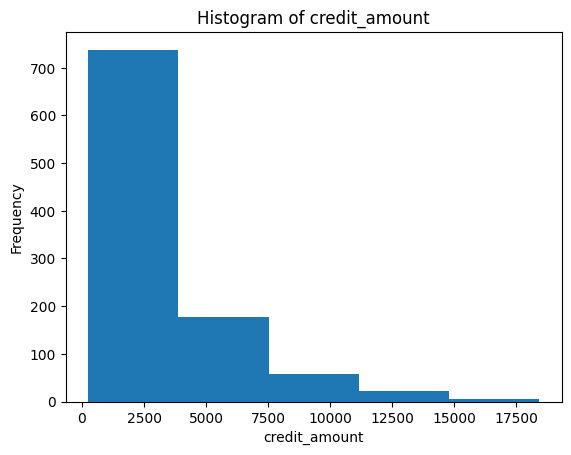

Normalized distribution of credit_amount


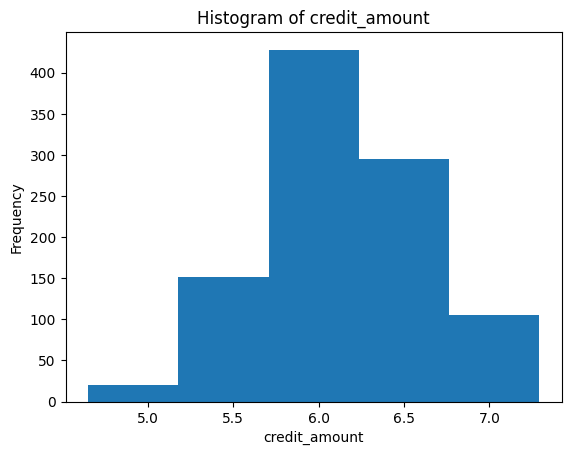

In [ ]:
print("Pre-normalized distribution of credit_amount")
plt.hist(df['credit_amount'], bins=5)
plt.xlabel('credit_amount')
plt.ylabel('Frequency')
plt.title('Histogram of credit_amount')
plt.show()

from scipy import stats
#apply the Box-Cox transformation to the 'column' column

cred_amt_raw = df['credit_amount']
transformed_data, lambda_value = stats.boxcox(df['credit_amount'])
df = df.drop('credit_amount', axis=1)

print("Normalized distribution of credit_amount")
#add the transformed data back to the DataFrame
df['credit_amount'] = transformed_data
plt.hist(df['credit_amount'], bins=5)
plt.xlabel('credit_amount')
plt.ylabel('Frequency')
plt.title('Histogram of credit_amount')
plt.show()

Pre-normalized distribution of duration


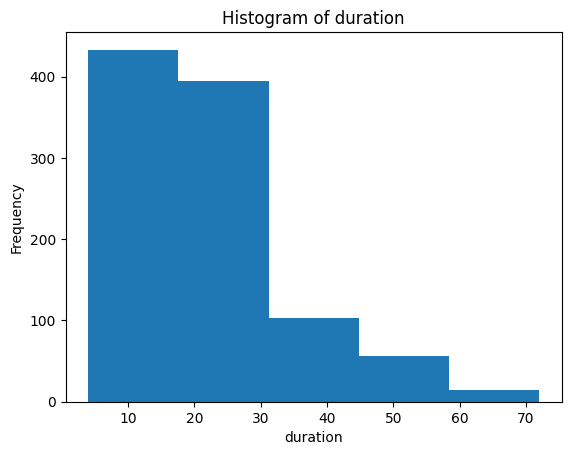

Normalized distribution of duration


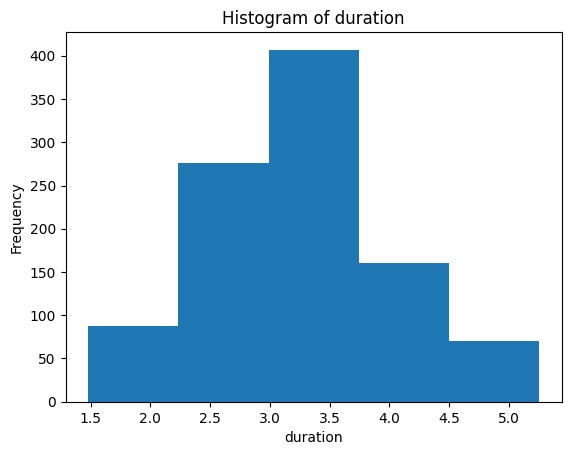

In [ ]:
print("Pre-normalized distribution of duration")
plt.hist(df['duration'], bins=5)
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Histogram of duration')
plt.show()

from scipy import stats
#apply the Box-Cox transformation to the 'column' column

duration_raw = df['duration']
transformed_data, lambda_value = stats.boxcox(df['duration'])
df = df.drop('duration', axis=1)

print("Normalized distribution of duration")
#add the transformed data back to the DataFrame
df['duration'] = transformed_data
plt.hist(df['duration'], bins=5)
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Histogram of duration')
plt.show()

In [ ]:
# get list of columns
cols = list(df.columns)

# move 'class' column to the end
cols.remove('class')
cols.append('class')

# reindex DataFrame with new column order
df = df.reindex(columns=cols)


## Modeling

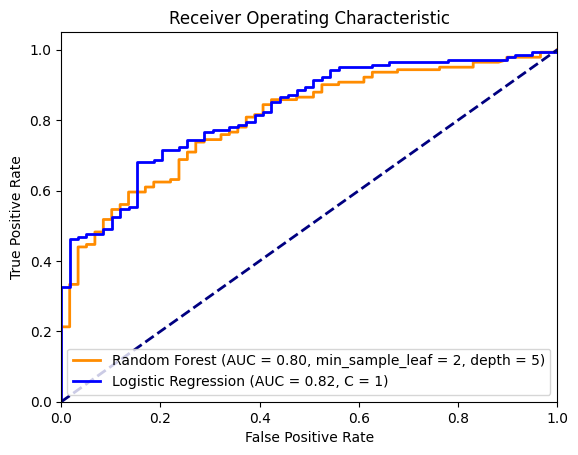

Random Forest: f1 score = 0.85, accuracy = 0.76, AUC = 0.80
Logistic Regression: f1 score = 0.85, accuracy = 0.78, AUC = 0.82


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_curve, auc

# split data into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test random forest with different min_sample_leaf and depth values
rf_auc_dict = {}
leaf_list = [1, 2, 4, 8, 16, 32, 64, 128]
for min_sample_leaf in leaf_list:
    for depth in range(1, 11):
        rf = RandomForestClassifier(min_samples_leaf=min_sample_leaf, max_depth=depth)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        f1_rf = f1_score(y_test, y_pred_rf)
        acc_rf = accuracy_score(y_test, y_pred_rf)
        y_probs_rf = rf.predict_proba(X_test)[:, 1]
        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
        auc_rf = auc(fpr_rf, tpr_rf)
        rf_auc_dict[(min_sample_leaf, depth)] = auc_rf

# test logistic regression with different C values
lr_auc_dict = {}
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    f1_lr = f1_score(y_test, y_pred_lr)
    acc_lr = accuracy_score(y_test, y_pred_lr)
    y_probs_lr = lr.predict_proba(X_test)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
    auc_lr = auc(fpr_lr, tpr_lr)
    lr_auc_dict[c] = auc_lr


# get best models and their parameters
best_rf_params = max(rf_auc_dict, key=rf_auc_dict.get)
best_lr_params = max(lr_auc_dict, key=lr_auc_dict.get)

# train best models
best_rf = RandomForestClassifier(min_samples_leaf=best_rf_params[0], max_depth=best_rf_params[1])
best_lr = LogisticRegression(C=best_lr_params, max_iter=1000)
best_rf.fit(X_train, y_train)
best_lr.fit(X_train, y_train)

# predict probabilities for the test data using the best models
y_probs_best_rf = best_rf.predict_proba(X_test)[:, 1]
y_probs_best_lr = best_lr.predict_proba(X_test)[:, 1]

# calculate f1 scores, accuracy, and auc for each model
rf_f1 = f1_score(y_test, best_rf.predict(X_test))
lr_f1 = f1_score(y_test, best_lr.predict(X_test))
rf_acc = accuracy_score(y_test, best_rf.predict(X_test))
lr_acc = accuracy_score(y_test, best_lr.predict(X_test))
rf_auc = auc(fpr_rf, tpr_rf)
lr_auc = auc(fpr_lr, tpr_lr)

# plot ROC curve for best models
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f, min_sample_leaf = %d, depth = %d)' % (rf_auc, best_rf_params[0], best_rf_params[1]))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f, C = %d)' % (lr_auc, best_lr_params))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# print f1, accuracy, and auc for best models
print("Random Forest: f1 score = %0.2f, accuracy = %0.2f, AUC = %0.2f" % (rf_f1, rf_acc, rf_auc))
print("Logistic Regression: f1 score = %0.2f, accuracy = %0.2f, AUC = %0.2f" % (lr_f1, lr_acc, lr_auc))


## Decision Logic

In [ ]:
# Calculate probabilities for the entire dataset using the logistic regression model
probs = lr.predict_proba(X)[:, 1]

# Add probabilities to the DataFrame as a new column
df['confidence'] = probs

# Display the updated DataFrame
print(df.head())


   other_payment_plans  checking_status_0<=X<200  checking_status_<0  \
0                    0                         0                   1   
1                    0                         1                   0   
2                    0                         0                   0   
3                    0                         0                   1   
4                    0                         0                   1   

   checking_status_>=200  checking_status_no checking  \
0                      0                            0   
1                      0                            0   
2                      0                            1   
3                      0                            0   
4                      0                            0   

   credit_history_critical/other existing credit  \
0                                              1   
1                                              0   
2                                              1   
3               

In [ ]:
# Drop the 'class' and 'confidence' columns and store them separately
class_column = y
probability_column = df.pop('confidence')

# Add the 'class' and 'probability' columns back to the DataFrame
df['class'] = class_column
df['confidence'] = probability_column

In [ ]:
a = 0.07  # Base interest rate for Personal_Loan(7%)
b = 0.06  # Base interest rate for Auto_Loan(6%)
c = 0.075  # Base interest rate for Business_Loan(7.5%)
d = 0.05  # Base interest rate for Education_Loan(5%)


In [ ]:
import numpy as np

# Define a function to calculate the future value of an annuity
def interest_calc(rate, n, principal):
    return principal * (((1 + rate)**n) - 1)

# Calculate risk
df['risk'] = 1 - df['confidence']

# Calculate the new interest rate based on the risk and the corresponding base interest rate for each loan type
df['new_interest_rate'] = df.apply(lambda row: a + (row['risk'] / (1 - row['risk'])) if row['Personal_Loan'] == 1 else
                                    (b + (row['risk'] / (1 - row['risk'])) if row['Auto_Loan'] == 1 else
                                    (c + (row['risk'] / (1 - row['risk'])) if row['Business_Loan'] == 1 else
                                    (d + (row['risk'] / (1 - row['risk'])) if row['Education_Loan'] == 1 else 0))), axis=1)

df['new_interest_rate'] = df.apply(lambda row: 0.30 if row['new_interest_rate']>=0.30 else row['new_interest_rate'], axis=1)

# Add raw values of credit amount and duration to data frame
df['credit_amount_raw'] = cred_amt_raw
df['duration_raw'] = duration_raw

# Calculate the future value of interest for the principal amount
df['Interest_FV'] = df.apply(lambda row: interest_calc(row['new_interest_rate']/12.0, row['duration_raw'], row['credit_amount_raw']), axis=1)

# Calculate the Present Value of interest for the principal amount
df['Interest_PV'] = df.apply(lambda row: row['Interest_FV'] / ((1 + row['risk']) ** (row['duration_raw']/12.0)), axis=1)

# Calculate the expected benefit Future Value
df['expected_benefit_FV'] = (1 - df['risk']) * df['Interest_FV'] - df['risk'] * df['credit_amount_raw']

# Calculate the expected benefit Present Value
df['expected_benefit_PV'] = (1 - df['risk']) * df['Interest_PV'] - df['risk'] * df['credit_amount_raw']



71118.15714117573 8


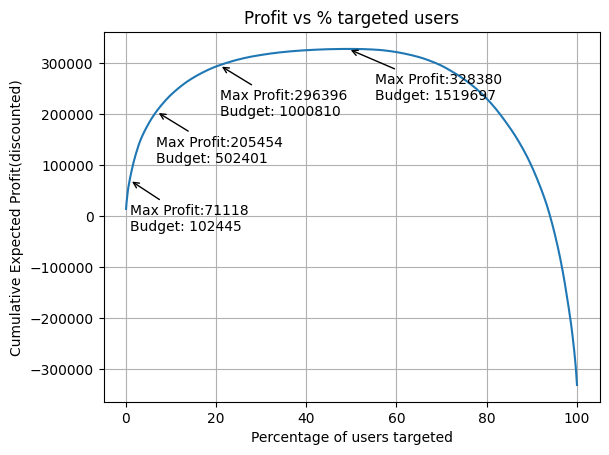

In [ ]:
# Sort the rows in descending order of Present Value of expected benefit
df_sorted = df.sort_values(by='expected_benefit_PV', ascending=False)

# Calculate cumulative benefits and cumulative credit amount for all the sorted values
df_sorted['EB_PV_cumsum'] = df_sorted['expected_benefit_PV'].cumsum()
df_sorted['cred_amt_cumsum'] = df_sorted['credit_amount_raw'].cumsum()

# Plot the expected benefit curve 
x_ax = [i/10.0 for i in range(1, df.shape[0]+1)]
plt.xlabel('Percentage of users targeted')
plt.ylabel('Cumulative Expected Profit(discounted)')
plt.grid()
plt.title('Profit vs % targeted users')
max_profit = df_sorted['EB_PV_cumsum'].max()
df_sorted = df_sorted.reset_index(drop=True)

row_id_100k = (df_sorted['cred_amt_cumsum']>100000  ).idxmax()
row_id_500k = (df_sorted['cred_amt_cumsum']>500000  ).idxmax()
row_id_1M = (df_sorted['cred_amt_cumsum']>1000000  ).idxmax()

print(df_sorted.loc[row_id_100k, 'EB_PV_cumsum'] , row_id_100k)
plt.annotate('Max Profit:'+str(int(df_sorted['EB_PV_cumsum'].max()))+ '\nBudget: '+ str( int(df_sorted.loc[df_sorted['EB_PV_cumsum'] == max_profit , 'cred_amt_cumsum'].values[0]) ), xy=(x_ax[df_sorted['EB_PV_cumsum'].argmax(axis=0)], df_sorted['EB_PV_cumsum'].max()) ,xytext=(x_ax[df_sorted['EB_PV_cumsum'].argmax(axis=0)]+6, df_sorted['EB_PV_cumsum'].max()-100000), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Max Profit:'+str(int(df_sorted.loc[row_id_100k, 'EB_PV_cumsum']))+ '\nBudget: '+ str( int(df_sorted.loc[row_id_100k, 'cred_amt_cumsum'])) , xy=(x_ax[row_id_100k], df_sorted.loc[row_id_100k, 'EB_PV_cumsum']) ,xytext=(x_ax[row_id_100k], df_sorted.loc[row_id_100k, 'EB_PV_cumsum']-100000), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Max Profit:'+str(int(df_sorted.loc[row_id_500k, 'EB_PV_cumsum']))+ '\nBudget: '+ str( int(df_sorted.loc[row_id_500k, 'cred_amt_cumsum'])) , xy=(x_ax[row_id_500k], df_sorted.loc[row_id_500k, 'EB_PV_cumsum']) ,xytext=(x_ax[row_id_500k], df_sorted.loc[row_id_500k, 'EB_PV_cumsum']-100000), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Max Profit:'+str(int(df_sorted.loc[row_id_1M, 'EB_PV_cumsum']))+ '\nBudget: '+ str( int(df_sorted.loc[row_id_1M, 'cred_amt_cumsum'])) , xy=(x_ax[row_id_1M], df_sorted.loc[row_id_1M, 'EB_PV_cumsum']) ,xytext=(x_ax[row_id_1M], df_sorted.loc[row_id_1M, 'EB_PV_cumsum']-100000), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.plot(x_ax, np.array(df_sorted['EB_PV_cumsum']))


In [ ]:
df_sorted.iloc[:15, -18:]

,Personal_Loan,Auto_Loan,Business_Loan,Education_Loan,credit_amount,duration,class,confidence,risk,new_interest_rate,credit_amount_raw,duration_raw,Interest_FV,Interest_PV,expected_benefit_FV,expected_benefit_PV,EB_PV_cumsum,cred_amt_cumsum
0,1,0,0,0,7.203635,4.982714,1,0.828304,0.171696,0.277287,15653.0,60.0,45987.572501,20824.047262,35404.112535,14561.072184,14561.072184,15653.0
1,0,1,0,0,7.133728,4.982714,1,0.796198,0.203802,0.300000,13756.0,60.0,46767.507785,18499.890224,34432.703461,11926.079340,26487.151524,29409.0
2,1,0,0,0,6.966598,4.982714,1,0.846132,0.153868,0.251849,10144.0,60.0,25128.186571,12285.143613,19700.920826,8834.013002,35321.164526,39553.0
3,1,0,0,0,7.150169,4.364819,1,0.830289,0.169711,0.274400,14179.0,39.0,20065.257196,12055.610624,14253.625730,7603.305300,42924.469827,53732.0
4,1,0,0,0,6.970841,4.659559,1,0.837092,0.162908,0.264612,10222.0,48.0,18899.878242,10334.208620,14155.684496,6985.432982,49909.902809,63954.0
5,1,0,0,0,7.092319,4.659559,1,0.911079,0.088921,0.167600,12749.0,48.0,12060.214518,8577.659928,9854.143228,6681.262436,56591.165245,76703.0
6,0,1,0,0,7.005067,4.252711,1,0.815971,0.184029,0.285534,10875.0,36.0,14481.545500,8724.238638,9815.197538,5117.403974,61708.569219,87578.0
7,0,0,1,0,6.807282,4.659559,1,0.876177,0.123823,0.216323,7629.0,48.0,10356.037597,6492.339164,8129.067506,4743.785691,66452.354910,95207.0
8,1,0,0,0,6.777545,4.659559,1,0.854006,0.145994,0.240952,7238.0,48.0,11557.276078,6700.785105,8813.273308,4665.802232,71118.157141,102445.0
9,0,1,0,0,6.891162,4.659559,1,0.889673,0.110327,0.184009,8858.0,48.0,9531.306915,6271.171456,7502.467775,4602.013648,75720.170789,111303.0


In [ ]:
np.sum(df_sorted['cred_amt_cumsum']<100000)

8

For a budget under 100K, the bank should only target top 8% of the loan applicants from the table above.